In [101]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Read Data

In [71]:
df = pd.read_csv(r'F:\JUPTER NOTEBOOK\RAVI SHANKAR PROJECTS\CODSOFT\IRIS.csv')

In [72]:
print('Dimension of data')
rows = df.shape[0]
print('Rows:', rows)

columns = df.shape[1]
print('Columns:', columns)

Dimension of data
Rows: 150
Columns: 5


In [73]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Preprocessing

In [82]:
# To display no. of samples on each class
df['species'].value_counts() 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [76]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [77]:
# check for duplicate values
df.duplicated().sum()

3

In [78]:
#preprocessing the dataset

#checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [83]:
df["sepal_length"]=df["sepal_length"].round(3)
df["sepal_width"]=df["sepal_width"].round(3)
df["petal_length"]=df["petal_length"].round(3)
df["petal_width"]=df["petal_width"].round(3)

# Check Outliers

In [87]:
num_cols = []
cat_cols = []

for column in df.columns:
    if df.dtypes[column] != 'object':
        num_cols.append(column)
    else:
        cat_cols.append(column)

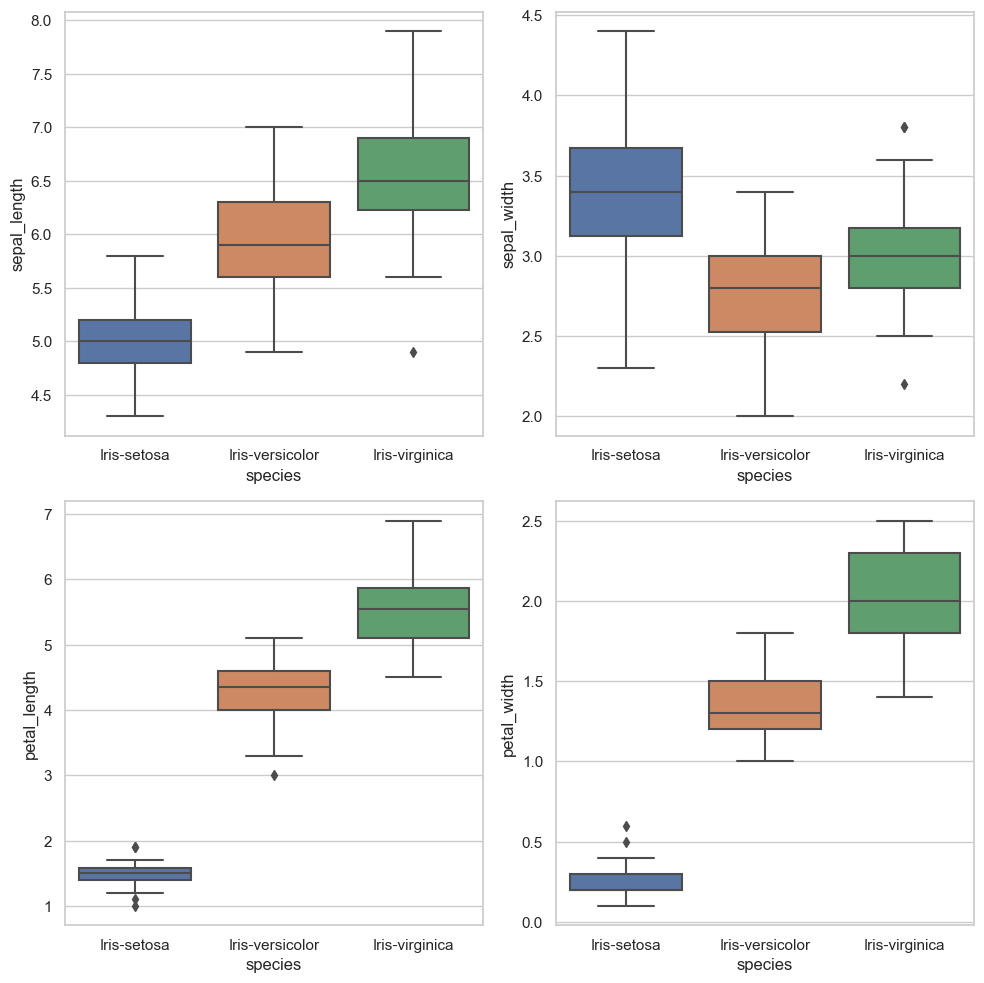

In [98]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
r=2
c=2
n=1
for i in num_cols:
    plt.subplot(r,c,n)
    sns.boxplot(df['species'],df[i],  orient="v")
    n+=1
plt.tight_layout()
plt.show()

# EDA

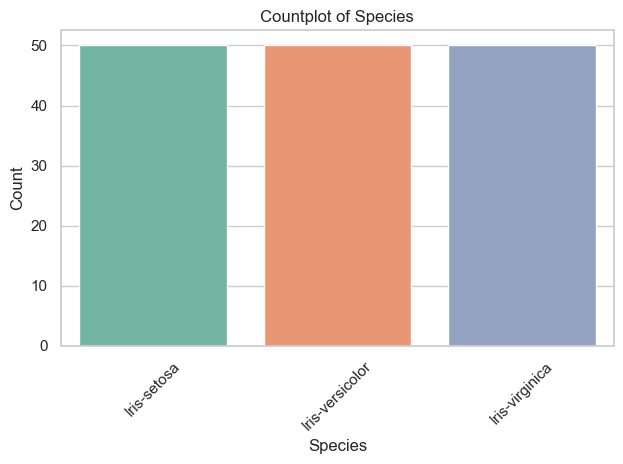

In [97]:
sns.countplot(data=df, x="species", palette="Set2") 
plt.title("Countplot of Species") 
plt.xlabel("Species")  
plt.ylabel("Count")

plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

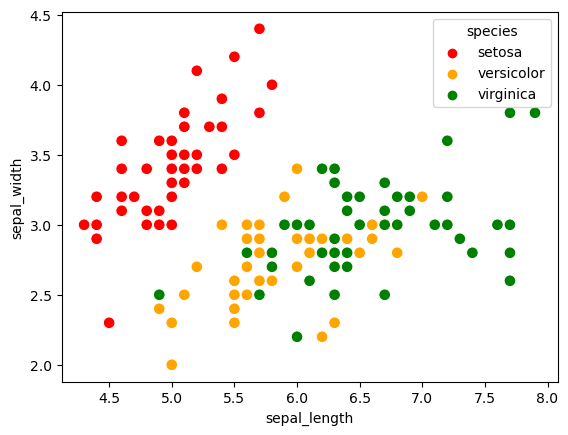

In [44]:
sns.scatterplot(df.sepal_length, df.sepal_width, hue=df.species, s=70, palette =['red','orange','green'])
plt.show()

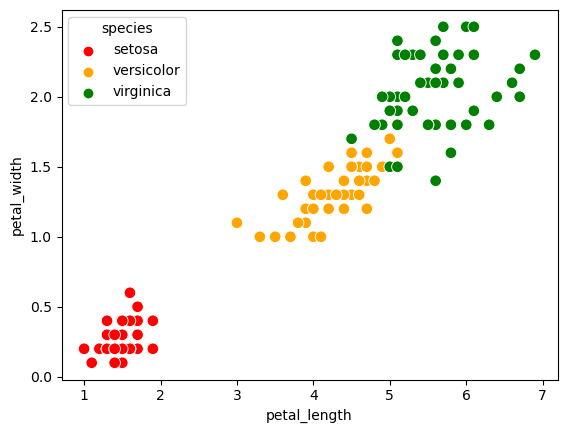

In [45]:
sns.scatterplot(df.petal_length, df.petal_width, hue=df.species, s=70, palette =['red','orange','green'])
plt.show()

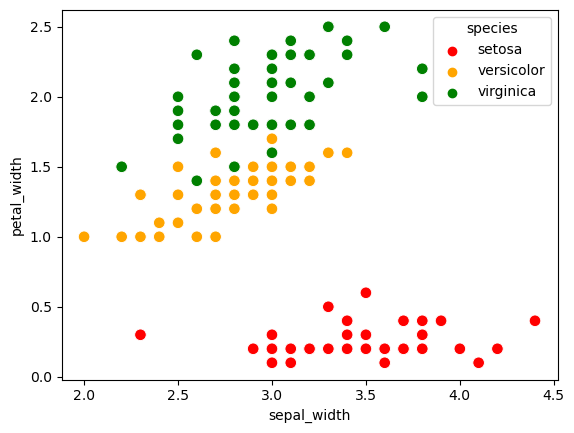

In [43]:
sns.scatterplot(df.sepal_width, df.petal_width, hue=df.species, s=70,palette =['red','orange','green'])
plt.show()

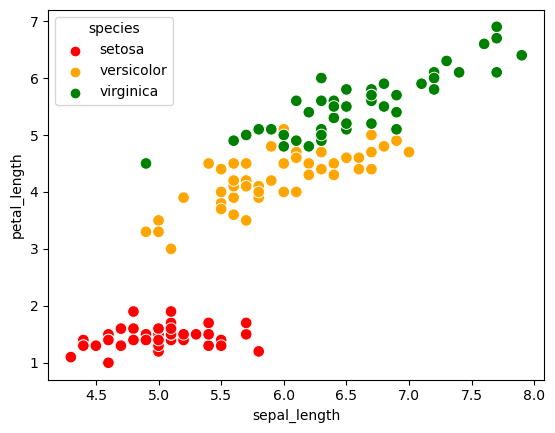

In [42]:
sns.scatterplot(df.sepal_length, df.petal_length, hue=df.species, s=70, palette =['red','orange','green'])
plt.show()

In [46]:
#coorelation matrix
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

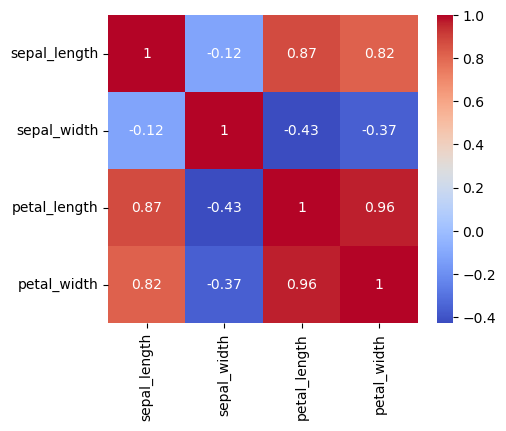

In [48]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

# Transform Categorical column into Numerical

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [50]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Split the data into train and test

In [59]:
#model training
#train - 70
#test - 30
x=df.drop(columns=['species'])
y=df['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=10)

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()

In [61]:
lg.fit(x_train,y_train)

LogisticRegression()

In [99]:
y_pred = lg.predict(x_test)

In [102]:
#metrics to get performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [105]:
#decision tree
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [106]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred_rf = rf.predict(x_test)

In [111]:
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [112]:
df=pd.DataFrame({"y_pred_rf":y_pred_rf,"y_test":y_test})
df

,y_pred_rf,y_test
87,1,1
111,2,2
10,0,0
91,1,1
49,0,0
60,1,1
72,1,1
67,1,1
39,0,0
55,1,1


As we can see both Logistic Regression and Random Forest gives 100% accuracy on the data so we can
use either model to do the prediciton